In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pp

In [4]:
df = pd.read_csv('master.csv')

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [32]:
X= df[['year']]
y= df['suicides_no']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=101)

In [10]:
X_train

,year
7649,2013
13714,2014
13423,1989
7791,1993
22360,2012
...,...
5695,1989
8006,2011
17745,2009
17931,1991


In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])

In [14]:
coeff_df

,Coefficient
year,-0.300512


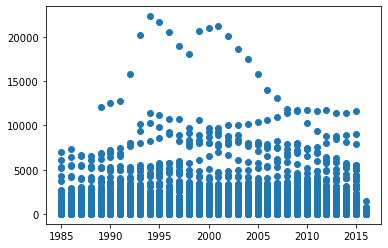

In [18]:
pp.scatter(X,y)

In [19]:
m, c = np.random.random(),np.random.random()

In [22]:
def learn(X, y, m, c, epoch):
  for i in range(epoch):
    error = y-(m*X+c)
    X_error = (y-(m*X+c))*X
    error = np.sum(error)/len(X)
    X_error = np.sum(X_error)/len(X)
    learning_rate = 0.01
    delta_m = learning_rate*X_error
    delta_c = learning_rate*error
    m += delta_m
    c += delta_c
    return (m,c)

In [23]:
m,c = learn(X, y, m, c, 20000)

MemoryError: Unable to allocate 5.77 GiB for an array with shape (27821, 27820) and data type float64